In [1]:
### Import Modules ###
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
## Obtained Data From: 
# https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/data

# Read in Data #
df_titanic = pd.read_csv("titanic.csv", dtype=
                        {'pclass': 'category', #Passenger Class - 1-3
                         'survived': float, # Categorical - Survived Y/N
                         'name': str, # Name of Passenger
                         'sex': 'category', # Sex of Passenger
                         'age': float, # Age of Passenger
                         'sibsp': float, # Num of Siblings on Board
                         'parch': float, # Num of Parents on Board
                         'ticket': str, # Ticket Num
                         'fare': float, # Passenger Fare
                         'cabin': str, # Passenger's Cabin
                         'embarked': 'category', # Location of Embarkment
                         'boat': 'category', # Lifeboat (if survived)
                         'body': float, # Body # if not survived
                        })
# List to Drop
to_drop = ['boat', # Determination of survived/not
           'body', # Determination of survived/not
           'home.dest', # N/A
          ]

# Drop Columns
df_titanic.drop(columns=to_drop, inplace=True) 

# Show df
print(df_titanic.shape)
df_titanic.head(2)

(1310, 11)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S


In [29]:
df_titanic.dtypes

pclass      category
survived     float64
name          object
sex         category
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked    category
dtype: object

[Text(0.5, 0, 'Survived'), Text(0, 0.5, 'Count')]

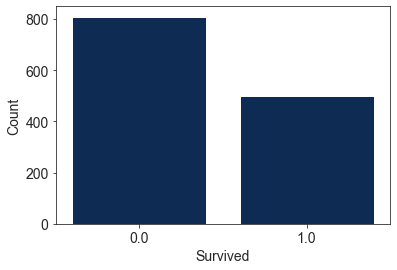

In [30]:
### EDA of Total Data ###
style = {'figure.figsize': (6, 4), 
         "axes.facecolor": "white", 
         "font.family": "Times New Roman",
         "font.size": 14
}

plt.rcParams.update(style)
sns.set_style("ticks")
sns.despine()

# Count Plot of Classes # 
count_plot = sns.countplot(x=df_titanic.survived, color = "#01295F")
count_plot.set(xlabel="Survived", ylabel="Count")

In [31]:
### Split into Train/Test ###
train, test = train_test_split(df_titanic, test_size=.2, random_state=42, shuffle=True)

# Print out shape of dfs 
print("Train Size:\n {}".format(train.shape))
print("Test Size:\n {}".format(test.shape))

data_types_dict = {'name': str}

train = train.astype(data_types_dict)
#train['name'] = train['name'].astype(str)

Train Size:
 (1048, 11)
Test Size:
 (262, 11)


In [32]:
### FEATURE ENGINEERING - Exploration ###

# View the Training Data for all Feature Engineering #
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 199 to 1126
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1047 non-null   category
 1   survived  1047 non-null   float64 
 2   name      1048 non-null   object  
 3   sex       1047 non-null   category
 4   age       835 non-null    float64 
 5   sibsp     1047 non-null   float64 
 6   parch     1047 non-null   float64 
 7   ticket    1047 non-null   object  
 8   fare      1046 non-null   float64 
 9   cabin     232 non-null    object  
 10  embarked  1046 non-null   category
dtypes: category(3), float64(5), object(3)
memory usage: 76.9+ KB


Survived:
0.0    0.629417
1.0    0.370583
Name: survived, dtype: float64



[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Count')]

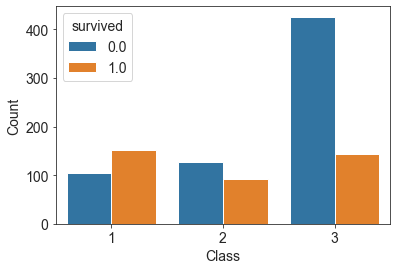

In [33]:
### Survived ###
print("Survived:\n{}\n".format(train.survived.value_counts(normalize=True)))

# Survived by PClass - 
sns.countplot(x = train['pclass'], hue=train['survived']).set(xlabel="Class", ylabel="Count")

In [34]:
train['name'].head()

199     Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
303                             Warren, Mr. Frank Manley
481    Laroche, Mrs. Joseph (Juliette Marie Louise La...
331                             Bailey, Mr. Percy Andrew
10                                Astor, Col. John Jacob
Name: name, dtype: object

In [35]:
### NAME ###
train['name'] = pd.Series(train['name'], dtype="string")

train['name_title'] = train['name'].apply(lambda x: x.split(',')[-1]).apply(lambda x: x.split()[0])
train['name_title'].value_counts()

Mr.          607
Miss.        214
Mrs.         149
Master.       47
Dr.            8
Rev.           7
Col.           4
Mlle.          2
Ms.            2
Don.           1
Major.         1
nan            1
Sir.           1
Jonkheer.      1
Lady.          1
the            1
Mme.           1
Name: name_title, dtype: int64

In [36]:
train['survived'].groupby(train['name_title']).mean()

name_title
Col.         0.500000
Don.         0.000000
Dr.          0.500000
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.000000
Master.      0.489362
Miss.        0.668224
Mlle.        1.000000
Mme.         1.000000
Mr.          0.151565
Mrs.         0.785235
Ms.          0.500000
Rev.         0.000000
Sir.         1.000000
nan               NaN
the          1.000000
Name: survived, dtype: float64

In [40]:
# length of name
train['name_len'] = train['name'].apply(lambda x: len(x))
train['survived'].groupby(pd.qcut(train['name_len'],5)).mean()

name_len
(2.999, 19.0]    0.197479
(19.0, 23.0]     0.287234
(23.0, 27.0]     0.323770
(27.0, 32.0]     0.423077
(32.0, 82.0]     0.671795
Name: survived, dtype: float64

In [41]:
# distribution of length of name
pd.qcut(train['name_len'],5).value_counts()

(23.0, 27.0]     244
(2.999, 19.0]    239
(32.0, 82.0]     195
(19.0, 23.0]     188
(27.0, 32.0]     182
Name: name_len, dtype: int64

In [37]:
### Sex ###
train['survived'].groupby(train['sex']).mean()

sex
female    0.719677
male      0.178994
Name: survived, dtype: float64

In [38]:
### Age ###

# Check age for missing values
train['survived'].groupby(train['age'].isnull()).mean()

# Tracks the difference bertween the survival rate of survival based on if the passenger has an age

age
False    0.391617
True     0.287736
Name: survived, dtype: float64

In [39]:
# Distribution of age 
pd.qcut(train['age'],5).value_counts()

(19.0, 25.0]     184
(0.166, 19.0]    179
(31.0, 42.0]     168
(42.0, 80.0]     154
(25.0, 31.0]     150
Name: age, dtype: int64

In [42]:
# Survived by age 
train['survived'].groupby(pd.qcut(train['age'],5)).mean()

age
(0.166, 19.0]    0.441341
(19.0, 25.0]     0.369565
(25.0, 31.0]     0.373333
(31.0, 42.0]     0.357143
(42.0, 80.0]     0.415584
Name: survived, dtype: float64

In [43]:
# Distribution of Age
pd.qcut(train['age'],5).value_counts()

(19.0, 25.0]     184
(0.166, 19.0]    179
(31.0, 42.0]     168
(42.0, 80.0]     154
(25.0, 31.0]     150
Name: age, dtype: int64

In [44]:
### SibSp ###
# Number of Siblings/Spouses Aboard

# Survival rage by sibling 
train['survived'].groupby(train['sibsp']).mean()

sibsp
0.0    0.335694
1.0    0.486381
2.0    0.486486
3.0    0.277778
4.0    0.157895
5.0    0.000000
8.0    0.000000
Name: survived, dtype: float64

In [46]:
# Num of Sib/Sp on board
train['sibsp'].value_counts()

0.0    706
1.0    257
2.0     37
4.0     19
3.0     18
5.0      6
8.0      4
Name: sibsp, dtype: int64

In [48]:
### Parch ###
# Number of Parents/Children Aboard
train['survived'].groupby(train['parch']).mean()

parch
0.0    0.329657
1.0    0.567164
2.0    0.475000
3.0    0.600000
4.0    0.200000
5.0    0.250000
6.0    0.000000
9.0    0.000000
Name: survived, dtype: float64

In [49]:
# Distro of Parch
train['parch'].value_counts()

0.0    816
1.0    134
2.0     80
3.0      5
4.0      5
5.0      4
9.0      2
6.0      1
Name: parch, dtype: int64

In [50]:
### Ticket ###
train['ticket'].head(n=10)

199         PC 17482
303           110813
481    SC/Paris 2123
331            29108
10          PC 17757
147           113796
422           233866
415           243880
946             1601
351            29750
Name: ticket, dtype: object

In [54]:
# ticket length 
# Try to derive some predictive value from the length of the ticket string
train['ticket'] = train['ticket'].astype(str)
train['ticket_len'] = train['ticket'].apply(lambda x: len(x))
train['ticket_len'].value_counts()

6     481
5     157
4     119
8      91
10     51
9      29
7      28
13     16
11     15
12     12
17     12
18     11
16     11
15     11
3       4
Name: ticket_len, dtype: int64

In [55]:
# Ticket Letter 
# could denote the location of the room in regard to the greater ship
train['ticket_lett'] = train['ticket'].apply(lambda x: str(x)[0])
train['ticket_lett'].value_counts()

3    349
2    219
1    170
S     80
P     76
C     57
A     36
W     13
7     10
F     10
4      9
6      7
L      4
5      3
9      2
8      2
n      1
Name: ticket_lett, dtype: int64

In [56]:
# survival rate by ticket letter
train.groupby(['ticket_lett'])['survived'].mean()

ticket_lett
1    0.576471
2    0.406393
3    0.255014
4    0.111111
5    0.000000
6    0.142857
7    0.300000
8    0.000000
9    0.500000
A    0.083333
C    0.350877
F    0.700000
L    0.250000
P    0.605263
S    0.325000
W    0.230769
n         NaN
Name: survived, dtype: float64

In [57]:
### Relationship: Class - Fare ###
pd.crosstab(pd.qcut(train['fare'], 5), columns=train['pclass'])

pclass,1,2,3
fare,,,
"(-0.001, 7.85]",5,3,202
"(7.85, 10.5]",0,26,188
"(10.5, 22.025]",0,100,105
"(22.025, 41.579]",74,82,53
"(41.579, 512.329]",178,10,20


In [60]:
### Cabin ###
train['cabin_letter'] = train['cabin'].apply(lambda x: str(x)[0])
train['cabin_letter'].value_counts()

n    816
C     76
B     51
D     40
E     28
A     17
F     16
G      3
T      1
Name: cabin_letter, dtype: int64

In [61]:
# Survied by Cabin Letter 
train['survived'].groupby(train['cabin_letter']).mean()

cabin_letter
A    0.529412
B    0.725490
C    0.565789
D    0.700000
E    0.642857
F    0.687500
G    0.333333
T    0.000000
n    0.295706
Name: survived, dtype: float64